In [55]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Pregnancy as target
train_x = pd.read_csv('csv_files/x_train_binary_IVF.csv')
train_y = pd.read_csv('csv_files/y_train_binary_IVF.csv')
test_x = pd.read_csv('csv_files/x_test_binary_IVF.csv')
test_y = pd.read_csv('csv_files/y_test_binary_IVF.csv')

# Chance of Live Birth as target
train_x_IVF = pd.read_csv('csv_files/train_binary_x.csv')
train_y_IVF = pd.read_csv('csv_files/train_binary_y.csv')
test_x_IVF = pd.read_csv('csv_files/test_binary_x.csv')
test_y_IVF = pd.read_csv('csv_files/test_binary_y.csv')

In [56]:
print('Test_x shape: ', test_x.shape)
print('Train_x shape: ', train_x.shape)
print('Train_y shape: ', train_y.shape)

print('Test_x_IVF shape: ', test_x_IVF.shape)
print('Train_x_IVF shape: ', train_x_IVF.shape)
print('Train_y_IVF shape: ', train_y_IVF.shape)

Test_x shape:  (31226, 27)
Train_x shape:  (124904, 27)
Train_y shape:  (124904, 1)
Test_x_IVF shape:  (31226, 28)
Train_x_IVF shape:  (124904, 28)
Train_y_IVF shape:  (124904, 1)


In [57]:
# Index for pregnancy model
index2name = list(train_x_IVF.columns)
print(index2name)

['Patient Age at Treatment', 'Total Number of Previous IVF cycles', 'Total number of IVF pregnancies', 'Type of Infertility - Female Primary', 'Type of Infertility - Female Secondary', 'Type of Infertility - Male Primary', 'Type of Infertility - Male Secondary', 'Type of Infertility -Couple Primary', 'Type of Infertility -Couple Secondary', 'Cause  of Infertility - Tubal disease', 'Cause of Infertility - Ovulatory Disorder', 'Cause of Infertility - Male Factor', 'Cause of Infertility - Patient Unexplained', 'Cause of Infertility - Endometriosis', 'Cause of Infertility - Cervical factors', 'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used', 'Number of foetal sacs with fetal pulsation', 'Embryos Transfered', 'Elective Single Embryo Transfer', 'Egg Source', 'Fresh Cycle', 'Frozen Cycle', 'Eggs Mixed With Partner Sperm', 'Eggs Mixed With Donor sperm', 'Total Embryos Thawed', 'Sperm From Partner', 'Sperm From Donor']


In [58]:
# Perceptron Model - Live birth prediction 
X = train_x_IVF.values
y = train_y_IVF.astype(int).values.ravel()

per_clf = Perceptron(
    penalty=None, 
    alpha=0.0001, 
    l1_ratio=0.15, 
    fit_intercept=True, 
    max_iter=1000, 
    tol=1e-3, 
    shuffle=True, 
    verbose=0, 
    eta0=1.0, 
    n_jobs=None, 
    random_state=42, 
    early_stopping=True, 
    validation_fraction=0.1, 
    n_iter_no_change=5, 
    class_weight=None, 
    warm_start=False)

per_clf.fit(X, y)

y_pred = per_clf.predict(test_x_IVF.values)

In [59]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
# IVF 
from sklearn.metrics import classification_report

# Live birth model 
print('Confusion Matrix:')
print(confusion_matrix(test_y_IVF, y_pred))
(tn, fp, fn, tp) = confusion_matrix(test_y_IVF, y_pred).ravel()
print('\n')
print(f'True negative: {tn}\nFalse Positive: {fp}\nFalse Negative: {fn}\nTrue Positive: {tp}')
# Results show 0 False Negatives = model tells the woman she will have a baby when she won't
print('\n')

print(classification_report(test_y_IVF, y_pred))

Confusion Matrix:
[[27387    64]
 [ 3237   538]]


True negative: 27387
False Positive: 64
False Negative: 3237
True Positive: 538


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     27451
           1       0.89      0.14      0.25      3775

    accuracy                           0.89     31226
   macro avg       0.89      0.57      0.59     31226
weighted avg       0.89      0.89      0.86     31226



In [73]:
# Index for IVF model
index_IVF_name = list(train_x_IVF.columns)
print(index_IVF_name)

['Patient Age at Treatment', 'Total Number of Previous IVF cycles', 'Total number of IVF pregnancies', 'Type of Infertility - Female Primary', 'Type of Infertility - Female Secondary', 'Type of Infertility - Male Primary', 'Type of Infertility - Male Secondary', 'Type of Infertility -Couple Primary', 'Type of Infertility -Couple Secondary', 'Cause  of Infertility - Tubal disease', 'Cause of Infertility - Ovulatory Disorder', 'Cause of Infertility - Male Factor', 'Cause of Infertility - Patient Unexplained', 'Cause of Infertility - Endometriosis', 'Cause of Infertility - Cervical factors', 'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used', 'Number of foetal sacs with fetal pulsation', 'Embryos Transfered', 'Elective Single Embryo Transfer', 'Egg Source', 'Fresh Cycle', 'Frozen Cycle', 'Eggs Mixed With Partner Sperm', 'Eggs Mixed With Donor sperm', 'Total Embryos Thawed', 'Sperm From Partner', 'Sperm From Donor']


Feature: 0 Patient Age at Treatment, Score: -2.241721642220751e-05
Feature: 1 Total Number of Previous IVF cycles, Score: 9.287132517773744e-05
Feature: 2 Total number of IVF pregnancies, Score: 0.029565106001409085
Feature: 3 Type of Infertility - Female Primary, Score: 6.404918977775953e-06
Feature: 4 Type of Infertility - Female Secondary, Score: 0.0
Feature: 5 Type of Infertility - Male Primary, Score: 6.404918977775953e-06
Feature: 6 Type of Infertility - Male Secondary, Score: 0.0
Feature: 7 Type of Infertility -Couple Primary, Score: 6.404918977775953e-06
Feature: 8 Type of Infertility -Couple Secondary, Score: 0.0
Feature: 9 Cause  of Infertility - Tubal disease, Score: 4.8036892333319646e-06
Feature: 10 Cause of Infertility - Ovulatory Disorder, Score: 2.0815986677771848e-05
Feature: 11 Cause of Infertility - Male Factor, Score: 3.202459488887699e-05
Feature: 12 Cause of Infertility - Patient Unexplained, Score: 2.4018446166659824e-05
Feature: 13 Cause of Infertility - Endomet

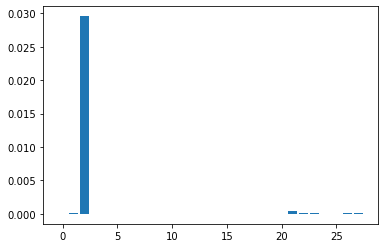

In [74]:
# Neural networks (including perceptron) do not have feature importance so I am looking at permutation importance
# CHANCE OF SUCCESFUL LIVE BIRTH MODEL 

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Perform permutation importance
results = permutation_importance(per_clf, X, y, scoring='neg_mean_squared_error')

# Get importance
importance = results.importances_mean

# Summarize feature importance
for i,v in enumerate(importance):
    # print('Feature: %0d, Score: %.5f' % (i,v))
    print(f'Feature: {i} {index_IVF_name[i]}, Score: {v}')

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [76]:
# USING SMOTE ON TRAIN_X

In [75]:
# Using SMOTE to resample target data 
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state = 100, sampling_strategy = 1.0)
train_x_smt, train_y_IVF_smt = smt.fit_resample(train_x, train_y_IVF)

smt_IVF = SMOTE(random_state = 100, sampling_strategy = 1.0)
train_x_IVF_smt, train_y_IVF_smt = smt_IVF.fit_resample(train_x_IVF, train_y_IVF)

In [77]:
# SMOTE values on y train pregnancy model & y train IVF successful model 
print('SMOTE for live birth')
print(train_y_IVF_smt.value_counts())

SMOTE for live birth
LiveBirth
0            109803
1            109803
dtype: int64


In [80]:
# Perceptron model with SMOTE for live birth
from sklearn.metrics import confusion_matrix

X1 = train_x_IVF_smt.values
y1 = train_y_IVF_smt.astype(int).values.ravel()

per_clf_smt = Perceptron(penalty=None, 
    alpha=0.0001, 
    l1_ratio=0.15, 
    fit_intercept=True, 
    max_iter=1000, 
    tol=1e-3, 
    shuffle=True, 
    verbose=0, 
    eta0=1.0, 
    n_jobs=None, 
    random_state=42, 
    early_stopping=True, 
    validation_fraction=0.1, 
    n_iter_no_change=5, 
    class_weight=None, 
    warm_start=False)

per_clf_smt.fit(X1, y1)
y_pred_smt = per_clf_smt.predict(test_x_IVF.values)
print('Confusion Matrix1:')
print(confusion_matrix(test_y_IVF, y_pred_smt))
print('\n')
(tn, fp, fn, tp) = confusion_matrix(test_y_IVF, y_pred_smt).ravel()
print(f'True negative: {tn}\nFalse Positive: {fp}\nFalse Negative: {fn}\nTrue Positive: {tp}')
print('\n')
# Results show 0 False Negatives = model tells the woman she will have a baby when she won't
print('Classification Report1:')
print(classification_report(test_y_IVF, y_pred_smt))
print('\n')

Confusion Matrix1:
[[25793  1658]
 [    0  3775]]


True negative: 25793
False Positive: 1658
False Negative: 0
True Positive: 3775


Classification Report1:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     27451
           1       0.69      1.00      0.82      3775

    accuracy                           0.95     31226
   macro avg       0.85      0.97      0.89     31226
weighted avg       0.96      0.95      0.95     31226





Feature: 0 Patient Age at Treatment, Score: 0.005409688259883612
Feature: 1 Total Number of Previous IVF cycles, Score: -0.0007285775434186674
Feature: 2 Total number of IVF pregnancies, Score: 0.4641976995164067
Feature: 3 Type of Infertility - Female Primary, Score: 2.7321657878193184e-06
Feature: 4 Type of Infertility - Female Secondary, Score: 5.464331575640024e-06
Feature: 5 Type of Infertility - Male Primary, Score: 2.094660437328838e-05
Feature: 6 Type of Infertility - Male Secondary, Score: 2.7321657878193184e-06
Feature: 7 Type of Infertility -Couple Primary, Score: 2.1857326302561486e-05
Feature: 8 Type of Infertility -Couple Secondary, Score: 3.6428877170938124e-06
Feature: 9 Cause  of Infertility - Tubal disease, Score: 0.0011675455133284163
Feature: 10 Cause of Infertility - Ovulatory Disorder, Score: 0.001336939792173257
Feature: 11 Cause of Infertility - Male Factor, Score: 0.0008642751108803942
Feature: 12 Cause of Infertility - Patient Unexplained, Score: 0.00725207872

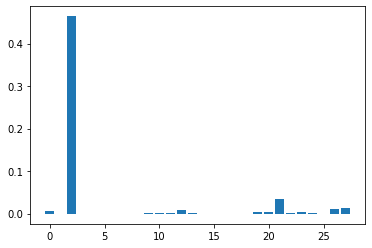

In [82]:
# Neural networks (including perceptron) do not have feature importance so I am looking at permutation importance
# CHANCE OF SUCCESFUL LIVE BIRTH MODEL 

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Perform permutation importance
results = permutation_importance(per_clf_smt, X1, y1, scoring='neg_mean_squared_error')

# Get importance
importance = results.importances_mean

# Summarize feature importance
for i,v in enumerate(importance):
    # print('Feature: %0d, Score: %.5f' % (i,v))
    print(f'Feature: {i} {index_IVF_name[i]}, Score: {v}')

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [83]:
# Now trying again, removing the 'total number of IVF pregnancies' to see if it gives different results

In [84]:
# Index for ivf model removing the 'total number of IVF pregnancies'
index2name = list(train_x.columns)
print(index2name)

['Patient Age at Treatment', 'Total Number of Previous IVF cycles', 'Type of Infertility - Female Primary', 'Type of Infertility - Female Secondary', 'Type of Infertility - Male Primary', 'Type of Infertility - Male Secondary', 'Type of Infertility -Couple Primary', 'Type of Infertility -Couple Secondary', 'Cause  of Infertility - Tubal disease', 'Cause of Infertility - Ovulatory Disorder', 'Cause of Infertility - Male Factor', 'Cause of Infertility - Patient Unexplained', 'Cause of Infertility - Endometriosis', 'Cause of Infertility - Cervical factors', 'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used', 'Number of foetal sacs with fetal pulsation', 'Embryos Transfered', 'Elective Single Embryo Transfer', 'Egg Source', 'Fresh Cycle', 'Frozen Cycle', 'Eggs Mixed With Partner Sperm', 'Eggs Mixed With Donor sperm', 'Total Embryos Thawed', 'Sperm From Partner', 'Sperm From Donor']


In [87]:
# Using SMOTE to resample target data & balance it
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state = 100, sampling_strategy = 1.0)
train_x_smt, train_y_IVF_smt2 = smt.fit_resample(train_x, train_y_IVF)

In [88]:
# See data imbalance without SMOTE 
# SMOTE values on y train pregnancy model & y train IVF successful model 
print('SMOTE for live birth, removing total number of IVF pregnanices')
print(train_y_IVF.value_counts())
print(train_y_IVF_smt2.value_counts())

SMOTE for live birth, removing total number of IVF pregnanices
LiveBirth
0            109803
1             15101
dtype: int64
LiveBirth
0            109803
1            109803
dtype: int64


In [89]:
# This model removes the 'total number of IVF pregnancies' to see if it gives different results, using SMOTE
X2 = train_x_smt.values
y2 = train_y_IVF_smt2.astype(int).values.ravel()

per_clf2 = Perceptron(
    penalty=None, 
    alpha=0.0001, 
    l1_ratio=0.15, 
    fit_intercept=True, 
    max_iter=1000, 
    tol=1e-3, 
    shuffle=True, 
    verbose=0, 
    eta0=1.0, 
    n_jobs=None, 
    random_state=42, 
    early_stopping=True, 
    validation_fraction=0.1, 
    n_iter_no_change=5, 
    class_weight=None, 
    warm_start=False)

per_clf2.fit(X2, y2)

y_pred2 = per_clf2.predict(test_x.values)

In [90]:
y_pred2

array([1, 1, 1, ..., 1, 1, 1])

In [91]:
from sklearn.metrics import confusion_matrix

print('Confusion Matrix1:')
print(confusion_matrix(test_y_IVF, y_pred2))

(tn, fp, fn, tp) = confusion_matrix(test_y_IVF, y_pred2).ravel()
print('\n')
print(f'True negative: {tn}\nFalse Positive: {fp}\nFalse Negative: {fn}\nTrue Positive: {tp}')
# Results show 0 False Negatives = model tells the woman she will have a baby when she won't
print('\n')

print('Classification Report1:')
print(classification_report(test_y_IVF, y_pred2))
print('\n')

Confusion Matrix1:
[[ 4454 22997]
 [  604  3171]]


True negative: 4454
False Positive: 22997
False Negative: 604
True Positive: 3171


Classification Report1:
              precision    recall  f1-score   support

           0       0.88      0.16      0.27     27451
           1       0.12      0.84      0.21      3775

    accuracy                           0.24     31226
   macro avg       0.50      0.50      0.24     31226
weighted avg       0.79      0.24      0.27     31226





In [92]:
# Now without SMOTE because those results are TERRIBLE
# This model removes the 'total number of IVF pregnancies' to see if it gives different results, using SMOTE
X3 = train_x.values
y3 = train_y_IVF.astype(int).values.ravel()

per_clf3 = Perceptron(
    penalty=None, 
    alpha=0.0001, 
    l1_ratio=0.15, 
    fit_intercept=True, 
    max_iter=1000, 
    tol=1e-3, 
    shuffle=True, 
    verbose=0, 
    eta0=1.0, 
    n_jobs=None, 
    random_state=42, 
    early_stopping=True, 
    validation_fraction=0.1, 
    n_iter_no_change=5, 
    class_weight=None, 
    warm_start=False)

per_clf3.fit(X3, y3)

y_pred3 = per_clf3.predict(test_x.values)

In [93]:
y_pred3

array([0, 0, 0, ..., 0, 0, 0])

In [94]:
# Print results

print('New Confusion Matrix:')
print(confusion_matrix(test_y_IVF, y_pred3))
(tn, fp, fn, tp) = confusion_matrix(test_y_IVF, y_pred3).ravel()
print(f'True negative: {tn}\nFalse Positive: {fp}\nFalse Negative: {fn}\nTrue Positive: {tp}')
# Results show 0 False Negatives = model tells the woman she will have a baby when she won't

print('\n')
print('New Classification Report:')
print(classification_report(test_y_IVF, y_pred3))

New Confusion Matrix:
[[27362    89]
 [ 3752    23]]
True negative: 27362
False Positive: 89
False Negative: 3752
True Positive: 23


New Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     27451
           1       0.21      0.01      0.01      3775

    accuracy                           0.88     31226
   macro avg       0.54      0.50      0.47     31226
weighted avg       0.80      0.88      0.82     31226



Feature: 0 Patient Age at Treatment, Score: -0.0003090373406776425
Feature: 1 Total Number of Previous IVF cycles, Score: -0.0001857426503554721
Feature: 2 Type of Infertility - Female Primary, Score: -3.2024594888879767e-06
Feature: 3 Type of Infertility - Female Secondary, Score: 6.404918977775953e-06
Feature: 4 Type of Infertility - Male Primary, Score: -4.8036892333319646e-06
Feature: 5 Type of Infertility - Male Secondary, Score: -1.6012297444439883e-06
Feature: 6 Type of Infertility -Couple Primary, Score: -3.2024594888879767e-06
Feature: 7 Type of Infertility -Couple Secondary, Score: -1.6012297444439883e-06
Feature: 8 Cause  of Infertility - Tubal disease, Score: -3.3625824633318205e-05
Feature: 9 Cause of Infertility - Ovulatory Disorder, Score: 7.525779798885635e-05
Feature: 10 Cause of Infertility - Male Factor, Score: 0.0
Feature: 11 Cause of Infertility - Patient Unexplained, Score: -0.00018894510984436287
Feature: 12 Cause of Infertility - Endometriosis, Score: -3.6828284

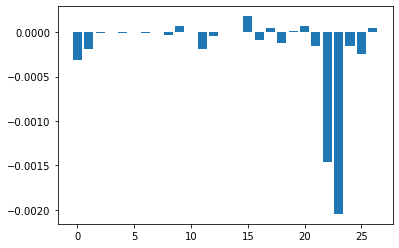

In [95]:
# Neural networks (including perceptron) do not have feature importance so I am looking at permutation importance
# CHANCE OF LIVE BIRTH MODEL WO TOTAL NO OF IVF PREGNANCIES

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Perform permutation importance
results_IVF3 = permutation_importance(per_clf3, X3, y3, scoring='neg_mean_squared_error')

# Get importance
importance_IVF3 = results_IVF3.importances_mean

# Summarize feature importance
for i,v in enumerate(importance_IVF3):
 #print('Feature: {}, Score: %.5f' % (i,v))
    print(f'Feature: {i} {index2name[i]}, Score: {v}')

# Plot feature importance
plt.bar([x for x in range(len(importance_IVF3))], importance_IVF3)
plt.show()

In [54]:
decision_function = per_clf3.decision_function(test_x.values)
print(decision_function)

[ -412.63755773 -1117.72271938  -628.27511546 ...   -77.2576501
  -322.93778793  -310.62009237]


In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score

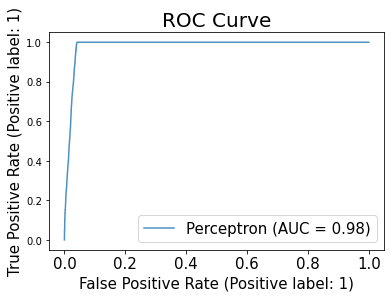

In [101]:
print('ROC Curve, wo SMOTE:')
# ROC curve for models
ax = plt.gca()
ax.set_title("ROC Curve", fontdict={'fontsize': 20})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=15)
plt.rc('legend', fontsize=15)  
rfc_disp = RocCurveDisplay.from_estimator(per_clf, test_x_IVF, test_y_IVF, ax=ax, alpha=0.8)
plt.show()

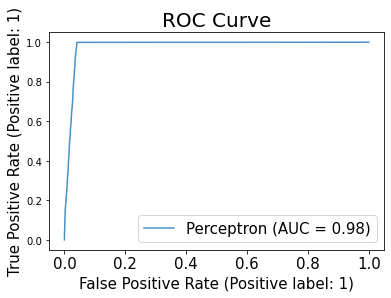

In [100]:
print('ROC Curve, w SMOTE:')
# ROC curve for models
ax = plt.gca()
ax.set_title("ROC Curve", fontdict={'fontsize': 20})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=15)
plt.rc('legend', fontsize=15)  
rfc_disp = RocCurveDisplay.from_estimator(per_clf_smt, test_x_IVF, test_y_IVF, ax=ax, alpha=0.8)
plt.show()

ROC Curve, w SMOTE wo IVF pregnancy:


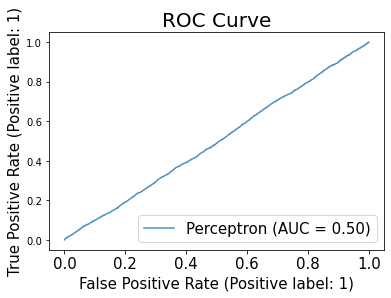

In [103]:
print('ROC Curve, w SMOTE wo IVF pregnancy:')
# ROC curve for models 
ax = plt.gca()
ax.set_title("ROC Curve", fontdict={'fontsize': 20})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=15)
plt.rc('legend', fontsize=15)  
rfc_disp = RocCurveDisplay.from_estimator(per_clf2, test_x, test_y_IVF, ax=ax, alpha=0.8)
plt.show()

ROC Curve, wo SMOTE wo IVF pregnancy:


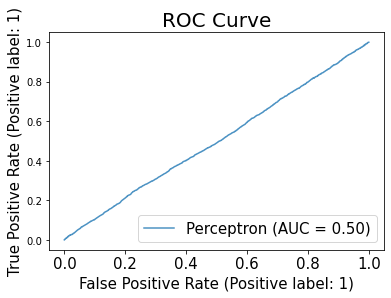

In [104]:
print('ROC Curve, wo SMOTE wo IVF pregnancy:')
# ROC curve for models 
ax = plt.gca()
ax.set_title("ROC Curve", fontdict={'fontsize': 20})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=15)
plt.rc('legend', fontsize=15)  
rfc_disp = RocCurveDisplay.from_estimator(per_clf3, test_x, test_y_IVF, ax=ax, alpha=0.8)
plt.show()